In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [128]:
class Perceptron:
    
    def __init__(self, learning_rate=0.0001 , epochs= 1000):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        
    # heaviside activation function
    def activation(self, z):
        return np.heaviside(z, 0) # haviside(z) heaviside -> activation
    
    def fit(self, x, y):
        n_features = x.shape[1]

        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0

        # Iterating until the number of epochs
        for epoch in range(self.epochs):
            # Traversing through the entire training set
            for i in range(len(x)):
                    y_pred = 0
                    for j in range(2):
                        y_pred += x.iloc[i, j] * self.weights[j]

                    y_pred += self.bias

                    if y_pred >= 0:
                        y_pred = 1
                    else:
                        y_pred = 0

                    for j in range(2):
                        self.weights[j] += self.learning_rate * (y.iloc[i] - y_pred) * x.iloc[i, j]
                    self.bias += self.learning_rate * (y.iloc[i] - y_pred)
            return self.weights, self.bias

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

In [129]:
class Adaline:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        error = np.zeros(self.num_epochs)

        for epoch in range(self.num_epochs):
            net_input = np.dot(X, self.weights) + self.bias
            output = self.activation(net_input)
            error[epoch]=0.5*np.mean((output-y)**2)
            errors = output - y.T
            self.weights -= ((self.learning_rate * (X.T.dot(errors)))/np.size(y)).T
            self.bias -= (self.learning_rate * np.mean(output))
            if (error[epoch]==0):break
        return self.weights ,self.bias

    def predict(self, X):
        net_input = np.dot(X, self.weights) + self.bias
        output = self.activation(net_input)
        return np.where(output >= 0.5, 1, 0)

    def activation(self, X):
        return X


In [130]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


In [131]:
def MSE(y_pred, y):
    return np.mean((y_pred - y)**2)

In [132]:
df = pd.read_csv("data_banknote_authentication.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [133]:
# separate the independent and dependent variables
X_data = df.iloc[ : , 0 : 2]
target = df.iloc[ : , -1]
print(X_data)
print("-"*50)
print(target)

      variance  skewness
0      3.62160   8.66610
1      4.54590   8.16740
2      3.86600  -2.63830
3      3.45660   9.52280
4      0.32924  -4.45520
...        ...       ...
1367   0.40614   1.34920
1368  -1.38870  -4.87730
1369  -3.75030 -13.45860
1370  -3.56370  -8.38270
1371  -2.54190  -0.65804

[1372 rows x 2 columns]
--------------------------------------------------
0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64


In [134]:
scale= StandardScaler()
# standardization of independent variables
scaled_data = scale.fit_transform(X_data) 
print(scaled_data)

[[ 1.12180565  1.14945512]
 [ 1.44706568  1.06445293]
 [ 1.20780971 -0.77735215]
 ...
 [-1.47235682 -2.62164576]
 [-1.40669251 -1.75647104]
 [-1.04712236 -0.43982168]]


In [135]:
print(target)

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64


In [136]:
scaled_data = pd.DataFrame(scaled_data)
print(scaled_data)

             0         1
0     1.121806  1.149455
1     1.447066  1.064453
2     1.207810 -0.777352
3     1.063742  1.295478
4    -0.036772 -1.087038
...        ...       ...
1367 -0.009711 -0.097693
1368 -0.641313 -1.158984
1369 -1.472357 -2.621646
1370 -1.406693 -1.756471
1371 -1.047122 -0.439822

[1372 rows x 2 columns]


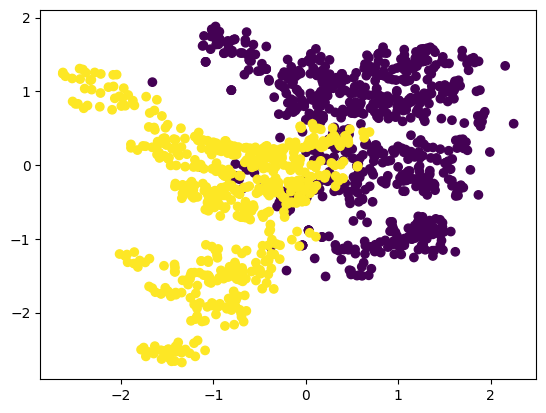

In [137]:
plt.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 1],c=target)
plt.show()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target , test_size=0.2, random_state=1)


Perceptron 

In [139]:
percept = Perceptron(learning_rate=0.0001, epochs=1000)
percept.fit(X_train, y_train)
percept_predictions = percept.predict(X_test)

In [140]:
print("Perceptron classification accuracy:", accuracy(y_test, percept_predictions)*100)
print("-"*50)
print("Perceptron classification MSE:", MSE(percept_predictions , y_test)*100)

Perceptron classification accuracy: 86.9090909090909
--------------------------------------------------
Perceptron classification MSE: 13.090909090909092


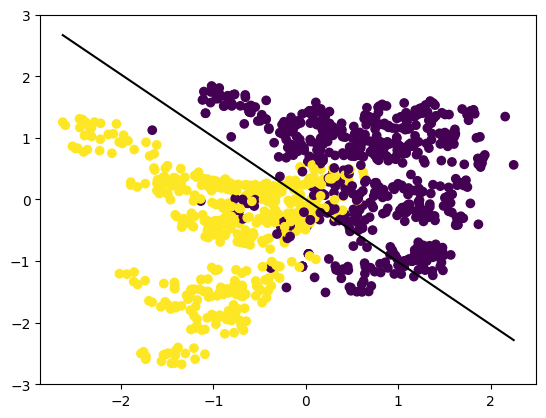

In [141]:
X_train=X_train.to_numpy()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])
x1_1 = (-percept.weights[0] * x0_1 - percept.bias) / percept.weights[1]
x1_2 = (-percept.weights[0] * x0_2 - percept.bias) / percept.weights[1]
ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")
ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])
plt.ylim(-3,3)
plt.show()

Adaline

In [142]:
ada = Adaline()
w, b =ada.fit(X_train,y_train)
ada_predictions = ada.predict(X_test)

In [143]:
print("Adaline classification accuracy:", accuracy(y_test, ada_predictions)*100)
print("-"*50)
print("Adaline classification MSE:", MSE(ada_predictions , y_test)*100)

Adaline classification accuracy: 69.45454545454545
--------------------------------------------------
Adaline classification MSE: 30.545454545454547


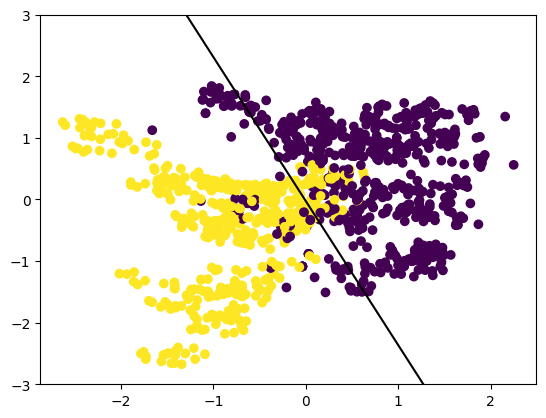

In [144]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])
x1_1 = (-w[0] * x0_1 - b) / w[1]
x1_2 = (-w[0] * x0_2 - b) / w[1]
ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")
ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])
plt.ylim(-3,3)
plt.show()